In [121]:
%matplotlib inline
import importlib
importlib.reload(nn)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nn import NeuralNetwork

## Steps Small Dataset

In [124]:
data_step_train = pd.read_csv("dane_nn2/steps-small-training.csv")
data_step_train = data_step_train.drop(data_step_train.columns[0], axis=1)
data_step_train.head()
X_step_train = data_step_train['x'].values.reshape(-1, 1)
y_step_train = data_step_train['y'].values.reshape(-1, 1)

data_step_test = pd.read_csv("dane_nn2/steps-small-test.csv")
data_step_test = data_step_test.drop(data_step_test.columns[0], axis=1)
X_step_test = data_step_test['x'].values.reshape(-1, 1)
y_step_test = data_step_test['y'].values.reshape(-1, 1)

Starting MSE: 6649.18
Epoch 0, Train MSE: 6642.71, Val MSE: 8043.13
Epoch 1000, Train MSE: 2043.12, Val MSE: 2420.84
Epoch 2000, Train MSE: 304.81, Val MSE: 498.26
Epoch 3000, Train MSE: 8.74, Val MSE: 88.85
Added noise to enable escape from local minimum or plateau
Added noise to enable escape from local minimum or plateau
Epoch 4000, Train MSE: 4.52, Val MSE: 94.77
Added noise to enable escape from local minimum or plateau
Added noise to enable escape from local minimum or plateau
Epoch 5000, Train MSE: 2.55, Val MSE: 92.85
Added noise to enable escape from local minimum or plateau
Added noise to enable escape from local minimum or plateau
Epoch 6000, Train MSE: 1.60, Val MSE: 93.81
Added noise to enable escape from local minimum or plateau
Added noise to enable escape from local minimum or plateau
Epoch 7000, Train MSE: 1.05, Val MSE: 89.45
Added noise to enable escape from local minimum or plateau
Added noise to enable escape from local minimum or plateau
Epoch 8000, Train MSE: 0.6

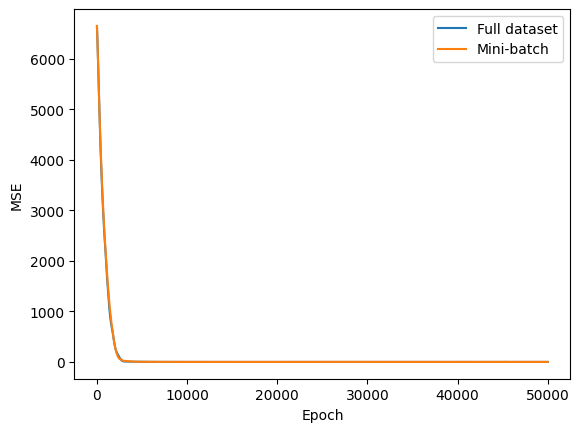

In [126]:
nn_step = NeuralNetwork(X_step_train, y_step_train, [1, 10, 10, 1], activation_fun="sigmoid", output_activation="linear")
history = nn_step.train(learning_rate=0.01, epochs=int(5e4), validation_data=(X_step_test, y_step_test), stop_condition=0.1)

nn_step_batch = NeuralNetwork(X_step_train, y_step_train, [1, 10, 10, 1], activation_fun="sigmoid", output_activation="linear")
history_batch = nn_step_batch.train(learning_rate=0.01, epochs=int(5e4), validation_data=(X_step_test, y_step_test), stop_condition=0.1, batch_size=10)

plt.plot(history, label="Full dataset")
plt.plot(history_batch, label="Mini-batch")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()
plt.show()

Full dataset MSE:  89.77037367865529
Mini-batch MSE:  127.38625945159633


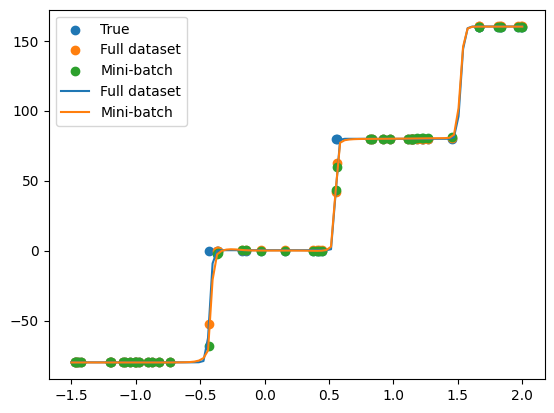

In [ ]:
y_pred = nn_step.predict(X_step_test)
y_pred_batch = nn_step_batch.predict(X_step_test)

print("Full dataset MSE: ", np.mean((y_step_test - y_pred) ** 2))
print("Mini-batch MSE: ", np.mean((y_step_test - y_pred_batch) ** 2))

x = np.linspace(min(X_step_test), max(X_step_test), 100).reshape(-1, 1)

plt.scatter(X_step_test, y_step_test, label="True")
plt.scatter(X_step_test, y_pred, label="Full dataset")
plt.scatter(X_step_test, y_pred_batch, label="Mini-batch")
plt.plot(x, nn_step.predict(x), label="Full dataset")
plt.plot(x, nn_step_batch.predict(x), label="Mini-batch")
plt.legend()
plt.show()

### Satisfying results impossible to achieve because of split of train and test data

In [128]:
## Square Simple dataset

In [129]:
data_square_train = pd.read_csv("dane_nn2/square-simple-training.csv")
data_square_train = data_square_train.drop(data_square_train.columns[0], axis=1)
data_square_train.head()
X_square_train = data_square_train['x'].values.reshape(-1, 1)
y_square_train = data_square_train['y'].values.reshape(-1, 1)

data_square_test = pd.read_csv("dane_nn2/square-simple-test.csv")
data_square_test = data_square_test.drop(data_square_test.columns[0], axis=1)
data_square_test.head()
X_square_test = data_square_test['x'].values.reshape(-1, 1)
y_square_test = data_square_test['y'].values.reshape(-1, 1)

In [149]:
nn_square_batch = NeuralNetwork(X_square_train, y_square_train, [1, 32, 64, 32, 1],
                                activation_fun='sigmoid')
history_square_batch = nn_square_batch.train(learning_rate=0.1, epochs=int(2e3), validation_data=(X_square_test, y_square_test), stop_condition=0.01, batch_size=20)
history_square_batch = nn_square_batch.train(learning_rate=0.01, epochs=int(5e4), validation_data=(X_square_test, y_square_test), stop_condition=0.01, batch_size=20)
history_square_batch = nn_square_batch.train(learning_rate=0.001, epochs=int(5e4), validation_data=(X_square_test, y_square_test), stop_condition=0.01, batch_size=20)
history_square_batch = nn_square_batch.train(learning_rate=0.0001, epochs=int(5e4), validation_data=(X_square_test, y_square_test), stop_condition=0.01, batch_size=20)

nn_square = NeuralNetwork(X_square_train, y_square_train, [1, 32, 64, 32, 1],
                          activation_fun='sigmoid')
history_square = nn_square.train(learning_rate=0.1, epochs=int(1e3), validation_data=(X_square_test, y_square_test), stop_condition=0.01)
history_square = nn_square.train(learning_rate=0.01, epochs=int(5e3), validation_data=(X_square_test, y_square_test), stop_condition=0.01)
history_square = nn_square.train(learning_rate=0.001, epochs=int(5e3), validation_data=(X_square_test, y_square_test), stop_condition=0.01)
history_square = nn_square.train(learning_rate=0.0001, epochs=int(5e3), validation_data=(X_square_test, y_square_test), stop_condition=0.01)


Starting MSE: 10119.83
Epoch 0, Train MSE: 9887.12, Val MSE: 8418.28
Epoch 1000, Train MSE: 2491.61, Val MSE: 2042.58
Added noise to enable escape from local minimum or plateau
Added noise to enable escape from local minimum or plateau
Training complete. Final loss: 1806.3098
Starting MSE: 2413.39
Epoch 2000, Train MSE: 2358.16, Val MSE: 1856.44
Epoch 3000, Train MSE: 2238.66, Val MSE: 1725.11
Added noise to enable escape from local minimum or plateau
Added noise to enable escape from local minimum or plateau
Epoch 4000, Train MSE: 2239.10, Val MSE: 1727.07
Added noise to enable escape from local minimum or plateau
Added noise to enable escape from local minimum or plateau
Epoch 5000, Train MSE: 2241.33, Val MSE: 1729.59
Added noise to enable escape from local minimum or plateau
Added noise to enable escape from local minimum or plateau
Epoch 6000, Train MSE: 2243.11, Val MSE: 1733.73
Added noise to enable escape from local minimum or plateau
Added noise to enable escape from local min

MSE for full:  1.353865822811667
MSE for mini-batch:  0.39935780468820475


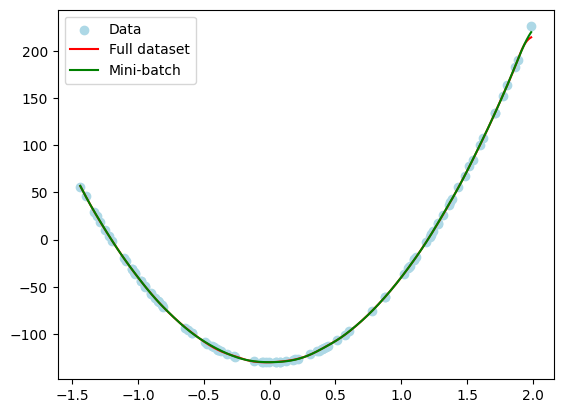

In [236]:
y_square_pred = nn_square.predict(X_square_test)
mse_square = np.mean(np.square(y_square_test - y_square_pred))
print("MSE for full: ", mse_square)

y_square_pred2 = nn_square_batch.predict(X_square_test)
mse_square2 = np.mean(np.square(y_square_test - y_square_pred2))
print("MSE for mini-batch: ", mse_square2)

x = np.linspace(min(X_square_test), max(X_square_test), 1000)
plt.scatter(X_square_test, y_square_test, color='lightblue', label='Data')
plt.plot(x, nn_square.predict(x), color='red', label='Full dataset')
plt.plot(x, nn_square_batch.predict(x), color='green', label='Mini-batch')
plt.legend()
plt.show()

## Multimodal large dataset

In [66]:
multimodal_train = pd.read_csv("dane_nn2/multimodal-large-training.csv")
multimodal_train.head()
X_multimodal_train = multimodal_train['x'].values.reshape(-1, 1)
y_multimodal_train = multimodal_train['y'].values.reshape(-1, 1)

multimodal_test = pd.read_csv("dane_nn2/multimodal-large-test.csv")
multimodal_test.head()
X_multimodal_test = multimodal_test['x'].values.reshape(-1, 1)
y_multimodal_test = multimodal_test['y'].values.reshape(-1, 1)

In [165]:
nn_multimodal = NeuralNetwork(X_multimodal_train, y_multimodal_train, [1, 50, 100, 50, 1],
                              activation_fun='sigmoid')

history_multimodal = nn_multimodal.train(0.1, int(5e2), validation_data=(X_multimodal_test, y_multimodal_test), stop_condition=5, report_interval=10, patience=100)
history_multimodal = nn_multimodal.train(0.01, int(1e3), validation_data=(X_multimodal_test, y_multimodal_test), stop_condition=5, report_interval=10, patience=100)
history_multimodal = nn_multimodal.train(0.001, int(5e2), validation_data=(X_multimodal_test, y_multimodal_test), stop_condition=5, report_interval=10, patience=100)
history_multimodal = nn_multimodal.train(0.0001, int(5e2), validation_data=(X_multimodal_test, y_multimodal_test), stop_condition=5, report_interval=10, patience=100)


Starting MSE: 5371.93
Epoch 0, Train MSE: 5313.95, Val MSE: 5364.39
Epoch 10, Train MSE: 4571.30, Val MSE: 4604.62
Epoch 20, Train MSE: 5457.53, Val MSE: 5509.98
Epoch 30, Train MSE: 3758.46, Val MSE: 3798.40
Epoch 40, Train MSE: 4255.48, Val MSE: 4158.07
Epoch 50, Train MSE: 5218.37, Val MSE: 5253.20
Epoch 60, Train MSE: 4301.51, Val MSE: 4148.81
Epoch 70, Train MSE: 3803.52, Val MSE: 3873.75
Epoch 80, Train MSE: 3801.07, Val MSE: 3698.38
Epoch 90, Train MSE: 3785.77, Val MSE: 3654.83
Epoch 100, Train MSE: 3277.01, Val MSE: 3232.27
Epoch 110, Train MSE: 2675.33, Val MSE: 2774.26
Epoch 120, Train MSE: 2966.48, Val MSE: 2971.41
Epoch 130, Train MSE: 2667.78, Val MSE: 2760.74
Epoch 140, Train MSE: 3566.40, Val MSE: 3592.82
Epoch 150, Train MSE: 2866.94, Val MSE: 2866.47
Epoch 160, Train MSE: 3625.85, Val MSE: 3652.23
Epoch 170, Train MSE: 2803.78, Val MSE: 2913.63
Epoch 180, Train MSE: 2545.91, Val MSE: 2567.35
Epoch 190, Train MSE: 2304.27, Val MSE: 2394.62
Epoch 200, Train MSE: 3092.59

In [198]:
history_multimodal = nn_multimodal.train(0.0005, int(5e2), validation_data=(X_multimodal_test, y_multimodal_test), stop_condition=5, report_interval=10, patience=100)

Starting MSE: 11.55
Epoch 10500, Train MSE: 11.56, Val MSE: 7.06
Epoch 10510, Train MSE: 11.53, Val MSE: 7.04
Epoch 10520, Train MSE: 11.52, Val MSE: 7.02
Epoch 10530, Train MSE: 11.50, Val MSE: 7.00
Epoch 10540, Train MSE: 11.48, Val MSE: 6.98
Epoch 10550, Train MSE: 11.46, Val MSE: 6.96
Epoch 10560, Train MSE: 11.44, Val MSE: 6.94
Epoch 10570, Train MSE: 11.43, Val MSE: 6.92
Epoch 10580, Train MSE: 11.41, Val MSE: 6.90
Epoch 10590, Train MSE: 11.39, Val MSE: 6.88
Epoch 10600, Train MSE: 11.38, Val MSE: 6.86
Epoch 10610, Train MSE: 11.36, Val MSE: 6.84
Epoch 10620, Train MSE: 11.34, Val MSE: 6.82
Epoch 10630, Train MSE: 11.33, Val MSE: 6.80
Epoch 10640, Train MSE: 11.31, Val MSE: 6.79
Epoch 10650, Train MSE: 11.29, Val MSE: 6.77
Epoch 10660, Train MSE: 11.27, Val MSE: 6.75
Epoch 10670, Train MSE: 11.26, Val MSE: 6.73
Epoch 10680, Train MSE: 11.24, Val MSE: 6.71
Epoch 10690, Train MSE: 11.23, Val MSE: 6.69
Epoch 10700, Train MSE: 11.21, Val MSE: 6.67
Epoch 10710, Train MSE: 11.19, Val 

In [231]:
nn_multimodal_batch = NeuralNetwork(X_multimodal_train, y_multimodal_train, [1, 50, 100, 50, 1],
                                    activation_fun='sigmoid')

history_multimodal_batch = nn_multimodal_batch.train(0.1, int(3e2), validation_data=(X_multimodal_test, y_multimodal_test), mini_batch=True, batch_size=100, stop_condition=1, report_interval=10)
history_multimodal_batch = nn_multimodal_batch.train(0.01, int(3e2), validation_data=(X_multimodal_test, y_multimodal_test), mini_batch=True, batch_size=100, stop_condition=1, report_interval=10)
history_multimodal_batch = nn_multimodal_batch.train(0.002, int(3e2), validation_data=(X_multimodal_test, y_multimodal_test), mini_batch=True, batch_size=100, stop_condition=1, report_interval=10)
history_multimodal_batch = nn_multimodal_batch.train(0.001, int(1e2), validation_data=(X_multimodal_test, y_multimodal_test), mini_batch=True, batch_size=100, stop_condition=1, report_interval=10)

Starting MSE: 5341.08
Epoch 0, Train MSE: 2870.37, Val MSE: 2961.80
Epoch 10, Train MSE: 1563.90, Val MSE: 1700.21
Epoch 20, Train MSE: 1829.32, Val MSE: 1943.76
Epoch 30, Train MSE: 1586.15, Val MSE: 1729.46
Epoch 40, Train MSE: 1704.93, Val MSE: 1755.77
Epoch 50, Train MSE: 1451.29, Val MSE: 1597.59
Epoch 60, Train MSE: 1397.69, Val MSE: 1530.74
Epoch 70, Train MSE: 897.42, Val MSE: 965.87
Epoch 80, Train MSE: 1025.72, Val MSE: 1028.53
Epoch 90, Train MSE: 695.52, Val MSE: 743.84
Epoch 100, Train MSE: 699.89, Val MSE: 719.44
Epoch 110, Train MSE: 397.40, Val MSE: 440.92
Epoch 120, Train MSE: 380.13, Val MSE: 412.09
Epoch 130, Train MSE: 223.30, Val MSE: 242.22
Epoch 140, Train MSE: 169.49, Val MSE: 178.48
Epoch 150, Train MSE: 201.18, Val MSE: 213.22
Epoch 160, Train MSE: 320.99, Val MSE: 343.36
Epoch 170, Train MSE: 294.17, Val MSE: 322.58
Epoch 180, Train MSE: 546.05, Val MSE: 554.45
Epoch 190, Train MSE: 58.44, Val MSE: 57.35
Epoch 200, Train MSE: 109.59, Val MSE: 113.02
Epoch 210

MSE for full:  6.180356144449432
MSE for mini-batch:  1.5445770659242555


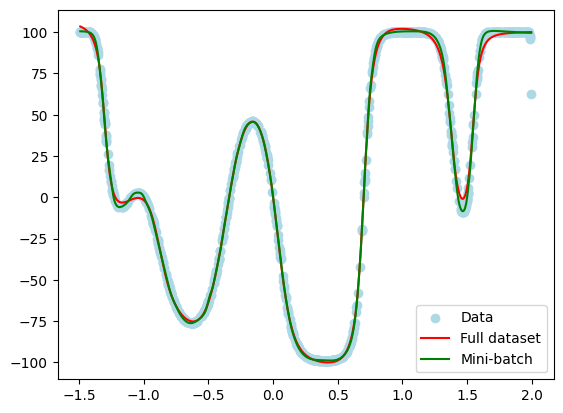

In [235]:
y_pred_multimodal = nn_multimodal.predict(X_multimodal_test)
mse_multimodal = np.mean(np.square(y_multimodal_test - y_pred_multimodal))
print("MSE for full: ", mse_multimodal)

y_pred_multimodal_batch = nn_multimodal_batch.predict(X_multimodal_test)
mse_multimodal_batch = np.mean(np.square(y_multimodal_test - y_pred_multimodal_batch))
print("MSE for mini-batch: ", mse_multimodal_batch)

x = np.linspace(min(X_multimodal_test), max(X_multimodal_test), 1000)
plt.scatter(X_multimodal_test, y_multimodal_test, color='lightblue', label='Data')
plt.plot(x, nn_multimodal.predict(x), color='red', label='Full dataset')
plt.plot(x, nn_multimodal_batch.predict(x), color='green', label='Mini-batch')
plt.legend()
plt.show()

Mini-batch o wiele lepiej poradził sobie w tym przypadku (dokładnośc + szybkość)